In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import joblib
from sklearn import tree
%matplotlib inline

games_data = pd.read_csv("vgsales.csv")

In [2]:
#games_data
#games_data.shape
#games_data.values
games_data.head()
#games_data.describe()
#games_data["EU_Sales"].hist(bins=500)
#games_data.dtypes
#games_data.mean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Preprocessing
# Drop rows with missing values (optional: handle differently if necessary)
games_data = games_data.dropna()

# Select features and target variable
# For simplicity, we'll use 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', and 'Other_Sales' as features
X = games_data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = games_data['Global_Sales']

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Train the model
regressor.fit(X_train, y_train)
tree.export_graphviz(regressor, out_file="regressor_model.dot", 
                     feature_names=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                    class_names=sorted(y.unique()), 
                    label="all",
                    rounded=True,
                    filled=True)

In [6]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.6407


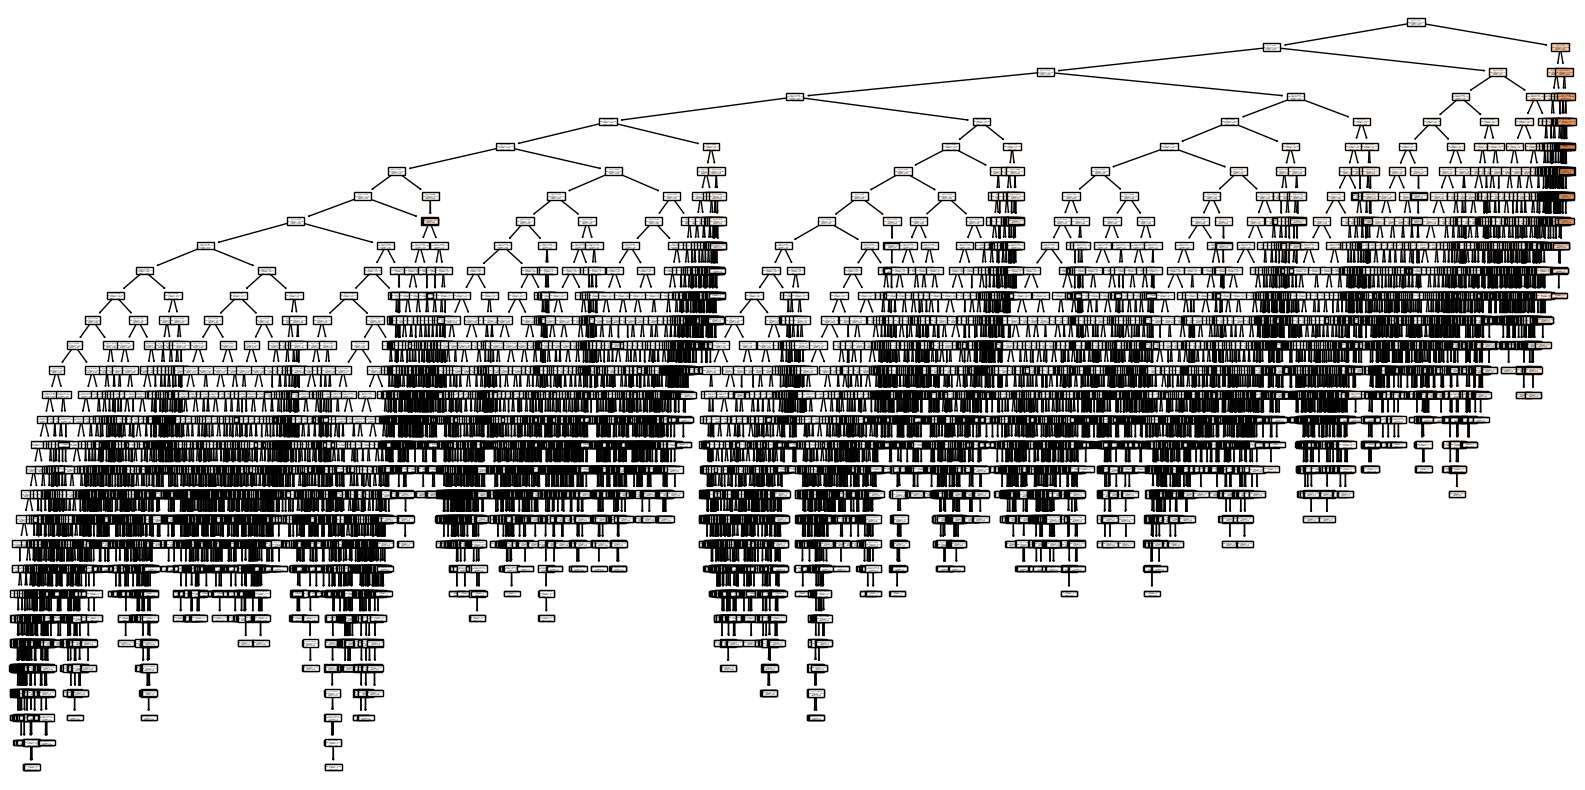

In [7]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True)
plt.show()

In [ ]:
# Save the model to a file
joblib.dump(regressor, 'regressor_model.pkl')

# Load the model from file (for future predictions)
# loaded_model = joblib.load('regressor_model.pkl')
# new_predictions = loaded_model.predict(X_test)